In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 7 ##

## Census ##

In [3]:
# Here is the census data we where looking at last time

full = Table.read_table('nc-est2014-agesex-res.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858
0,6,4066381,4066412,4073013,4074979,4097780,4143094,4134352
0,7,4030579,4030594,4043047,4083240,4084964,4108615,4154000
0,8,4046486,4046497,4025604,4053206,4093213,4095827,4119524
0,9,4148353,4148369,4125415,4035769,4063193,4104133,4106832


In [4]:
#Lets rederive the columns we want
# SEX, AGE, POPESTIMATE2010, POPESTIMATE2014

partial = full.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014')
partial

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [5]:
# Make things easier to read
# by relabeling the wordy columns
simple = partial.relabeled(2, '2010').relabeled(3, '2014')
simple

SEX,AGE,2010,2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


**Question**: Is SEX a numerical attribute or a catergorical attribute? 

**Question** Is AGE a numerical data type or a catergorical data type?

**Question** What does a row represent in this table?


In [30]:
#Lets Remove the total population 999 rows
remove_999=simple.sort('AGE').where("AGE",are.below(999))
remove_999
# Why is there more total indivuals that are 100 then those that are 99? 

SEX,AGE,2010,2014
0,0,3951330,3948350
1,0,2018420,2017857
2,0,1932910,1930493
0,1,3957888,3962123
1,1,2020332,2023253
2,1,1937556,1938870
0,2,4090862,3957772
1,2,2088685,2022502
2,2,2002177,1935270
0,3,4111920,4005190


In [31]:
#Lets now compare the ratio of men and women over time from 2010

wotable = remove_999.where('SEX',2).drop('2014')

wotable

SEX,AGE,2010
2,0,1932910
2,1,1937556
2,2,2002177
2,3,2010648
2,4,1993240
2,5,1988080
2,6,1993603
2,7,1979908
2,8,1971142
2,9,2018378


In [32]:
metable = remove_999.where('SEX',1).drop('2014')

metable

SEX,AGE,2010
1,0,2018420
1,1,2020332
1,2,2088685
1,3,2101272
1,4,2084312
1,5,2076573
1,6,2079410
1,7,2063139
1,8,2054462
1,9,2107037


In [33]:
# To find the ratio of men to women take the respective columns and divide
ratio_array = wotable.column('2010')/metable.column('2010')
ratio_array

array([0.95763518, 0.95902852, 0.95858255, 0.95687184, 0.95630597,
       0.95738508, 0.95873493, 0.95965807, 0.95944437, 0.95792243,
       0.95459133, 0.95530068, 0.95530625, 0.9571334 , 0.95279505,
       0.94937391, 0.94726397, 0.94260218, 0.94775588, 0.95784541,
       0.95916454, 0.95793306, 0.95911349, 0.96049965, 0.96337016,
       0.97018241, 0.97909983, 0.98434911, 0.98946146, 0.99317773,
       0.98577373, 0.99485459, 0.99759992, 1.00316651, 1.00244452,
       0.99949257, 1.00802539, 1.01428326, 1.01185994, 1.01254215,
       1.00382315, 1.00753161, 1.0093871 , 1.01566559, 1.01411786,
       1.01575115, 1.02327314, 1.02659551, 1.02863878, 1.03276844,
       1.02813171, 1.0359005 , 1.03922499, 1.04490722, 1.0502568 ,
       1.05228864, 1.06258617, 1.06622521, 1.06801588, 1.07601444,
       1.07591928, 1.08117178, 1.08154792, 1.08229936, 1.09473055,
       1.10461753, 1.1143212 , 1.12078356, 1.13422694, 1.15322124,
       1.16186237, 1.16284072, 1.18406939, 1.20262733, 1.22183

In [34]:
# Lets make a new table! 
# Question: What should be the columns of are table?


Table().with_column('AGE',np.arange(0,101)).with_column('W/M',ratio_array)

AGE,W/M
0,0.957635
1,0.959029
2,0.958583
3,0.956872
4,0.956306
5,0.957385
6,0.958735
7,0.959658
8,0.959444
9,0.957922


In [36]:
ratio=Table().with_column('AGE',np.arange(0,101)).with_column('W/M',ratio_array).sort("AGE",descending=True)
ratio

AGE,W/M
100,4.81852
99,4.27163
98,3.94918
97,3.66281
96,3.412
95,3.13023
94,2.89648
93,2.64001
92,2.46075
91,2.30271


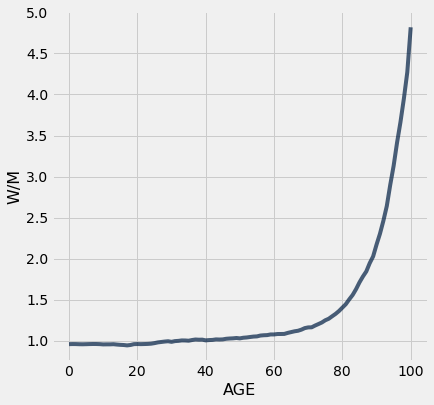

In [38]:
ratio.plot('AGE',"W/M")

## Line Plots ##

In [39]:
# Lets use a line graph to study the population size as age increases!
# Intuitively we should except that as age increases, population decreases
# Remove the age totals
remove_999

SEX,AGE,2010,2014
0,0,3951330,3948350
1,0,2018420,2017857
2,0,1932910,1930493
0,1,3957888,3962123
1,1,2020332,2023253
2,1,1937556,1938870
0,2,4090862,3957772
1,2,2088685,2022502
2,2,2002177,1935270
0,3,4111920,4005190


In [41]:
# Remove male and female (keep only combined)
everyone = remove_999.where('SEX', 0).drop('SEX')

In [42]:
everyone

AGE,2010,2014
0,3951330,3948350
1,3957888,3962123
2,4090862,3957772
3,4111920,4005190
4,4077552,4003448
5,4064653,4004858
6,4073013,4134352
7,4043047,4154000
8,4025604,4119524
9,4125415,4106832


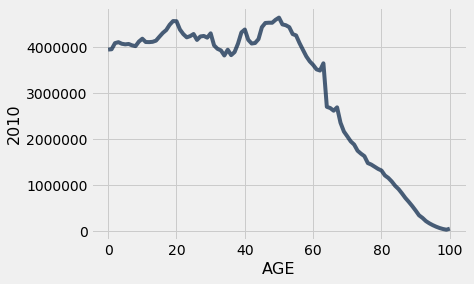

In [10]:
#Now lets plot it as a line graph
everyone.plot('AGE', '2010')

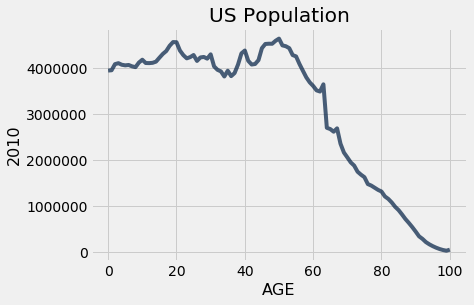

In [17]:
everyone.plot('AGE', '2010')
plots.title('US Population');    # <--- OPTIONAL; not needed for Data 8

In [ ]:
# Remeber Scatter plots are used for sequential data! Like age or distance

## Scatter Plots ##

In [ ]:
# Scatter plots are used for non-sequential data
# Its really import when we are looking for associations
# When we reach linear regression we will be able to 
# numberically judge assocations 

In [27]:
# Lets look how to find an association
# Actors and their highest grossing movies
actors = Table.read_table('actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


**Question** What does a row represent?

**Question** What type of attribute is the average per movie?

**Question** What type of attribute is the #1 movie?

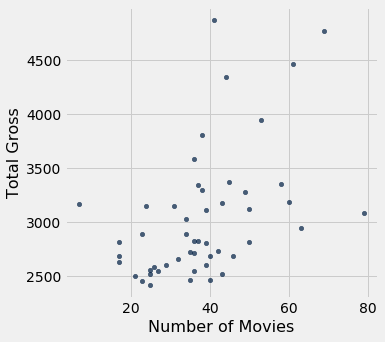

In [28]:
# The relationship that we want to explore is between the number of movies 
# an actor makes and the total amount of money they grossed

#Lets look at the scatter plot

actors.scatter('Number of Movies', 'Total Gross')

# Here we see an associtaion. 
# As the number of movies increase, the total gross increases
# This does not hold for every actor but is mostly true

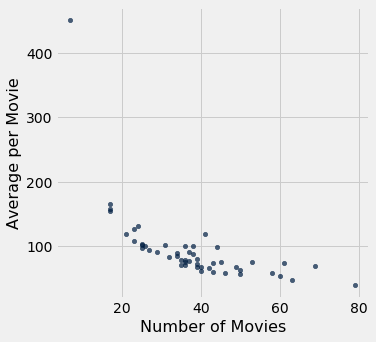

In [29]:
#Lets look at at another relation
# What about number of movies per average per movie 

# what are we trying to look at ? 
# well average per movie is found by taking total gross and dividing by
# number of movies. So the more movies an actor starred in the lower the 
#average


#lets graph it with number of movies as the x-axis

actors.scatter('Number of Movies', 'Average per Movie')

In [30]:
# lets find the actor who is the outlier! 
#
actors.where('Average per Movie', are.above(400))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


## Bar Charts ##

In [46]:
# Highest grossing movies as of 2017
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [47]:
top10_adjusted = top_movies.take(np.arange(10))
top10_adjusted

#Here we have a table of all top movies up to 2017
# Lets find the top 10 grossing files

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [34]:
# Convert to millions of dollars for readability
millions = np.round(top10_adjusted.column('Gross (Adjusted)') / 1000000, 3)
top10_adjusted = top10_adjusted.with_column('Millions', millions)
top10_adjusted

Title,Studio,Gross,Gross (Adjusted),Year,Millions
Gone with the Wind,MGM,198676459,1796176700,1939,1796.18
Star Wars,Fox,460998007,1583483200,1977,1583.48
The Sound of Music,Fox,158671368,1266072700,1965,1266.07
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,1261.09
Titanic,Paramount,658672302,1204368000,1997,1204.37
The Ten Commandments,Paramount,65500000,1164590000,1956,1164.59
Jaws,Universal,260000000,1138620700,1975,1138.62
Doctor Zhivago,MGM,111721910,1103564200,1965,1103.56
The Exorcist,Warner Brothers,232906145,983226600,1973,983.227
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,969.01


In [ ]:
top10_adjusted.barh('Title', 'Millions')
